In [217]:
                                              #Problem Statement
#Employee attrition (employees leaving a company) is a major concern for organizations as it increases recruitment and training costs.
#The goal is to analyze employee data, find patterns that lead to attrition, and build a machine learning model to predict whether
#an employee will leave or stay.

In [ ]:
#                                       Objectives
#Perform Exploratory Data Analysis (EDA) to identify factors influencing attrition.
#Apply feature engineering for better model performance.
#Build and evaluate ML models (Logistic Regression, Random Forest, XGBoost, etc.).
#Provide business insights to reduce attrition.

In [ ]:
                                  #Dataset
#Features include:
                 #Age
                #JobRole
                #MonthlyIncome
                #Education
                #WorkLifeBalance
                #YearsAtCompany
                #Overtime etc.

#Target variable: Attrition (Yes/No)

In [26]:
from google.colab import files
uploaded = files.upload()

Saving WA_Fn-UseC_-HR-Employee-Attrition.csv to WA_Fn-UseC_-HR-Employee-Attrition.csv


In [198]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [199]:
# Load dataset
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [200]:
# Check missing values
print(df.isnull().sum())


Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [201]:
df['Attrition'].value_counts()

,count
Attrition,
No,1233
Yes,237


In [202]:
if df['Attrition'].dtype == object:
    le = LabelEncoder()
    df['Attrition'] = le.fit_transform(df['Attrition'])


In [203]:
df['Attrition'].value_counts()

,count
Attrition,
0,1233
1,237


In [204]:
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

In [205]:
# Feature scaling
from sklearn.preprocessing import StandardScaler

# Separate target first
y = df['Attrition']

# Features only (exclude target)
X = df.drop(columns=['Attrition'])

# Scale only numeric feature columns
scaler = StandardScaler()
num_cols = X.select_dtypes(include=['int64', 'float64']).columns
X[num_cols] = scaler.fit_transform(X[num_cols])


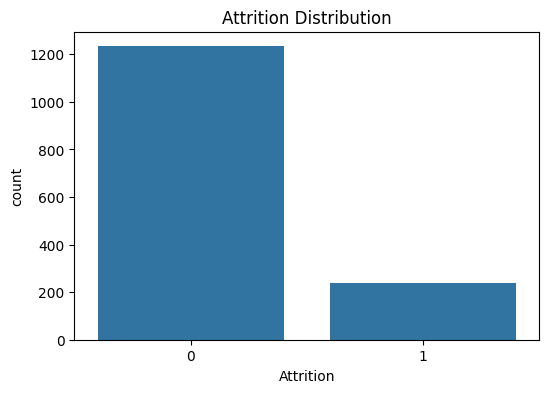

In [206]:
plt.figure(figsize=(6,4))
sns.countplot(x='Attrition', data=df)
plt.title("Attrition Distribution")
plt.show()

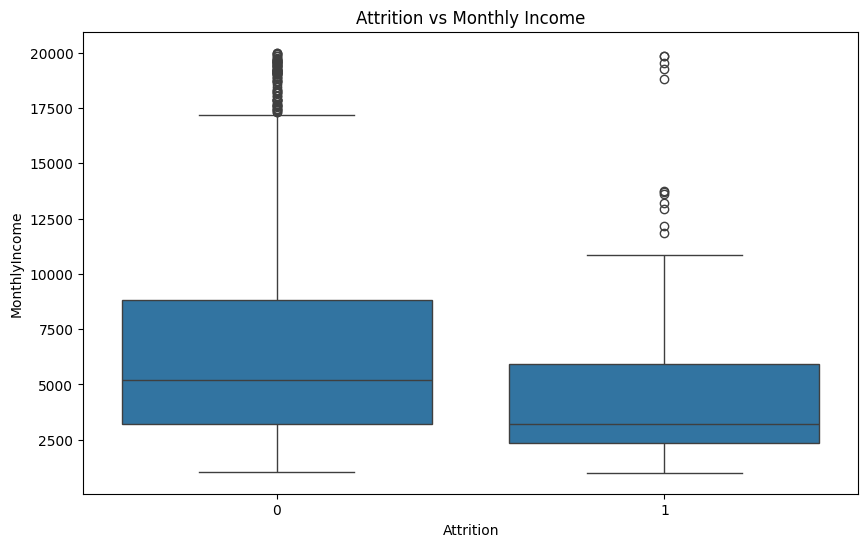

In [207]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df)
plt.title("Attrition vs Monthly Income")
plt.show()

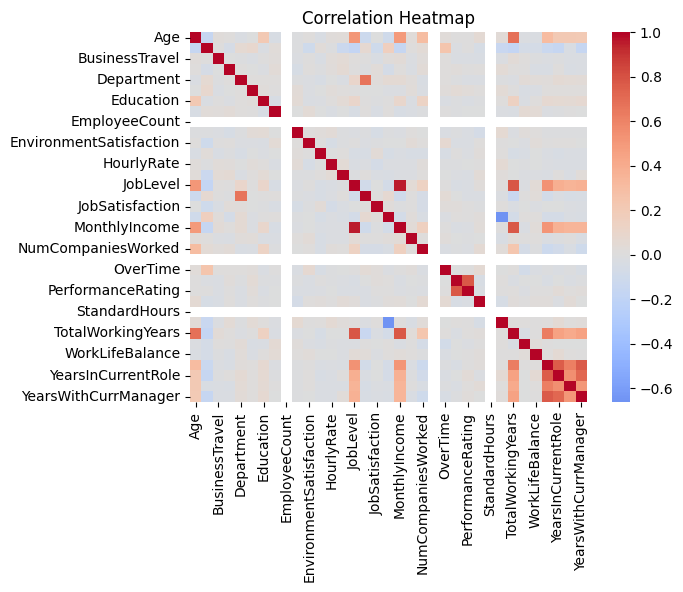

In [208]:
sns.heatmap(df.corr(), cmap="coolwarm", center=0)
plt.title("Correlation Heatmap")
plt.show()


In [209]:
print(df['Attrition'].unique())
print(df['Attrition'].dtype)


[1 0]
int64


In [210]:
# Target must be Attrition only
y = df['Attrition'].astype(int)

# Features are all other columns
X = df.drop(columns=['Attrition'])

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("y_train unique values:", y_train.unique())


y_train unique values: [0 1]


In [211]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


Logistic Regression Accuracy: 0.8469387755102041
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       247
           1       1.00      0.04      0.08        47

    accuracy                           0.85       294
   macro avg       0.92      0.52      0.50       294
weighted avg       0.87      0.85      0.78       294



In [212]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.8299319727891157
              precision    recall  f1-score   support

           0       0.85      0.97      0.91       247
           1       0.38      0.11      0.17        47

    accuracy                           0.83       294
   macro avg       0.62      0.54      0.54       294
weighted avg       0.78      0.83      0.79       294



In [213]:
from xgboost import XGBClassifier

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))


XGBoost Accuracy: 0.8469387755102041
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       247
           1       0.55      0.23      0.33        47

    accuracy                           0.85       294
   macro avg       0.71      0.60      0.62       294
weighted avg       0.82      0.85      0.82       294




Logistic Regression Accuracy: 0.8469387755102041


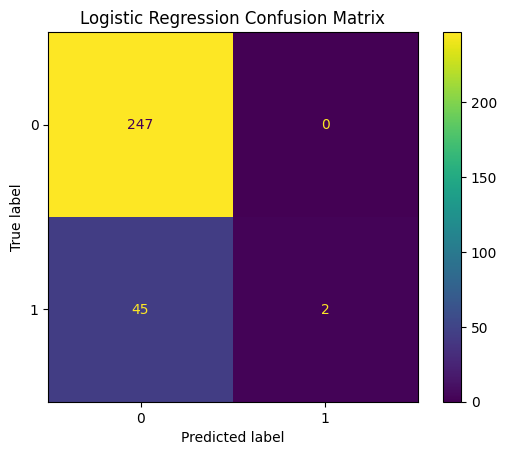


Random Forest Accuracy: 0.8299319727891157


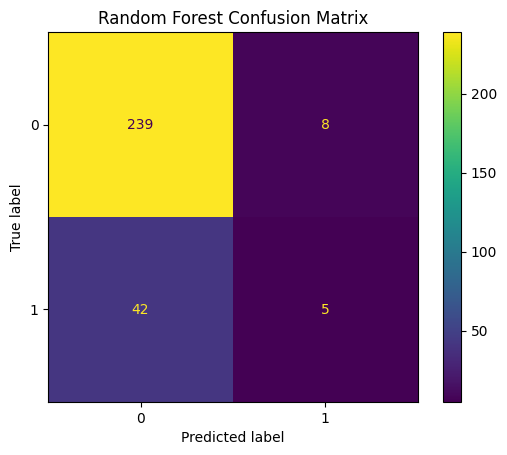


XGBoost Accuracy: 0.8469387755102041


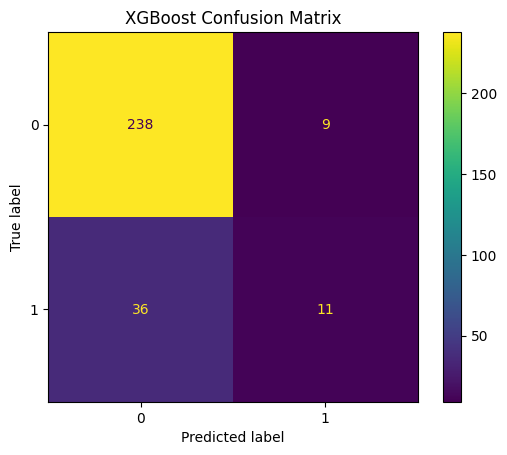

In [214]:
from sklearn.metrics import ConfusionMatrixDisplay

models = {'Logistic Regression': y_pred_lr,
          'Random Forest': y_pred_rf,
          'XGBoost': y_pred_xgb}

for name, preds in models.items():
    print(f"\n{name} Accuracy: {accuracy_score(y_test, preds)}")
    ConfusionMatrixDisplay.from_predictions(y_test, preds)
    plt.title(f"{name} Confusion Matrix")
    plt.show()


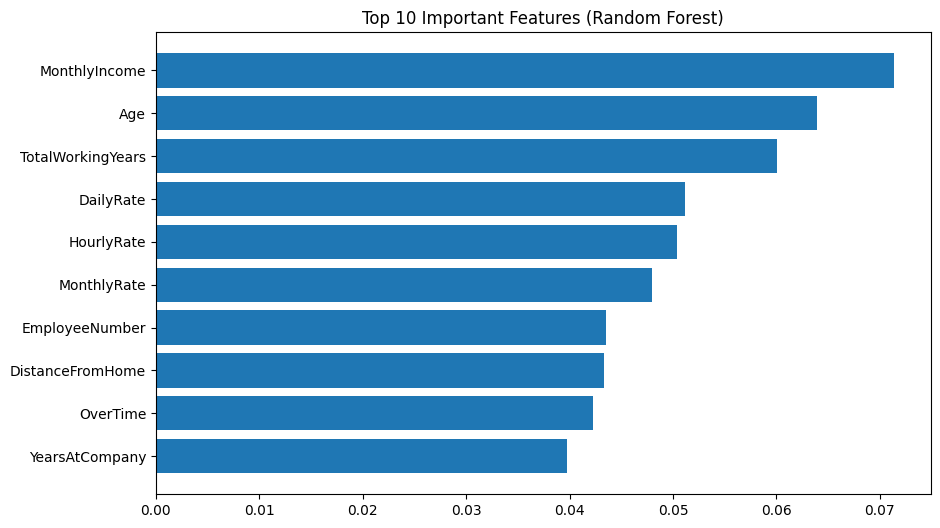

In [215]:
importances = rf.feature_importances_
indices = np.argsort(importances)[-10:]

plt.figure(figsize=(10,6))
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.title("Top 10 Important Features (Random Forest)")
plt.show()
